In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
import nltk
nltk.download('stopwords')
# import seaborn as sns
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cobaaja.csv berisi dataset yang sudah balance tapi belum dicleaning ulang datanya sebanyak 600 data

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1j7IzPXrl3G5bB7tKJyAy60V1VmTDnSWB', dest_path='./data.xlsx', showsize=True, overwrite = True) # 3000 data
datafix = pd.read_excel('data.xlsx', "datatest")
datafix = datafix.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

# datafix=pd.read_csv('cobaaja.csv',sep=';')

480.0 KiB Done.


In [ ]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [ ]:
datafix['length'] = datafix['tweet'].apply(length)
datafix.head(10)

,tweet,sentiment,length
0,ruu pks yang lupa,negative,17
1,ksbukansolusi masuk pasal sodomi dewasa sodomi...,negative,98
2,keras beda jahat cegah zina lindung,negative,35
3,sudah tahu yang tuhpantau saja tetepberubah,negative,43
4,ksbukansolusi masuk pasal zina dasar suka suka...,negative,92
5,gerak desak dpr sah rancang undangundang hapus...,negative,68
6,allah kasih tubuh sendi gerak diam,negative,34
7,indonesia negara damai sejahtera yaa hancur et...,negative,69
8,radikal yang sholat jamaah rajin baca quran pu...,negative,116
9,negara barat indonesia jiwa pancasila sila tuh...,negative,82


In [ ]:
POS_data = datafix[datafix['sentiment'] == 'positive']
NEG_data = datafix[datafix['sentiment'] == 'negative']
NET_data = datafix[datafix['sentiment'] == 'neutral']

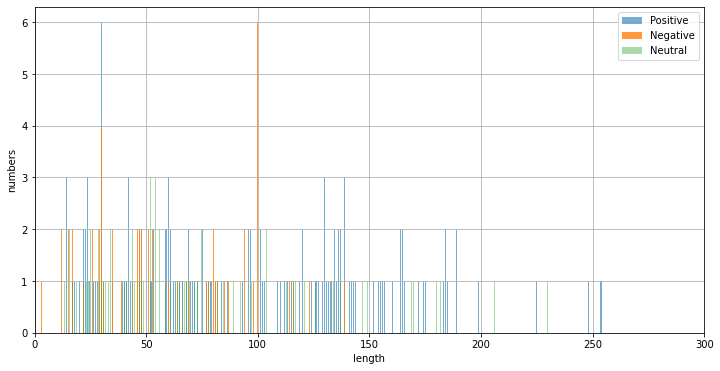

In [ ]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 500
plt.hist(POS_data['length'], alpha = 0.6, bins=bins, label='Positive')
plt.hist(NEG_data['length'], alpha = 0.8, bins=bins, label='Negative')
plt.hist(NET_data['length'], alpha = 0.4, bins=bins, label='Neutral')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,300)
plt.grid()
plt.savefig('hubungan.png')
plt.show()

Liatduludeh.csv berisi dataset yang sudah balance dan sudah dicleaning ulang untuk dianalisis persebaran katanya

In [ ]:
datafix = pd.read_excel('data.xlsx', "liatduludeh")
datafix = datafix.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

# datafix=pd.read_csv('liatduludeh.csv',sep=';')

In [ ]:
datafix['tweet'] = datafix['tweet'].str.lower()
stop = {'sekolah','online','daring','school','from','home','banget','tidak','jadi','kalau','bikin','tapi','buat','adik','murid','guru','orang','siswa','adek','biar','emang','pagi','sore','malam','siang','gini','engga','kalau','mungkin','pengen','asli','ngerasa','lain','melulu','alias','puter','yang','jadi','akibat','maka','lebih','lain','tetep','gamau','udah','pakai','gitu','adekku','adeknya','terima','systems','kayak','style','lomba','ayam','kakak','sama','class','ajar','anak','internet','wifi','pandemi','tugas','offline','protokol','kuota','teknologi','pelajaran','aspek','gaperlu','mandi','terap','teman','titik','baca','ulang','keliatan','ebook','resiko','kuliah','seneng','impian','rumah','catat','materi','ulang','buku','bangun','pikir','ngetik','semester','jadwal','adaptasi','penuh','sepenuh','hati','zoom','pakai','sumpah','selesai','kelas','masuk','minim','suka','kuat','jadwal','sistem','tatap','muka','warga','modul','kerja','video','pemerintah','sadar','percaya','temu','solusi','rekam','didik','sekolah','jalan','fasilitas','beda','daerah','sepakat','kalo','ulangan','open','book','Sekolah','ponakan','matematika','nilai','orangtua','math','science','lihat','senin','selasa','rabu','kamis','jumat','sabtu','jum\'at','minggu','zona','hijau','lupa','sarapan','kuning','program','kemdikbud','kemendikbud','ilmu','moga','semoga','lalu','gopay','saldo','beli','generasi','mood','belajar'}
datafix['tweet'] = datafix['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop) and len(word)>=4]))
stop = stopwords.words('indonesian')
datafix['tweet'] = datafix['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
# extracting the number of examples of each class
POS_len = datafix[datafix['sentiment'] == 'positive'].shape[0]
NEG_len = datafix[datafix['sentiment'] == 'negative'].shape[0]
NET_len = datafix[datafix['sentiment'] == 'neutral'].shape[0]

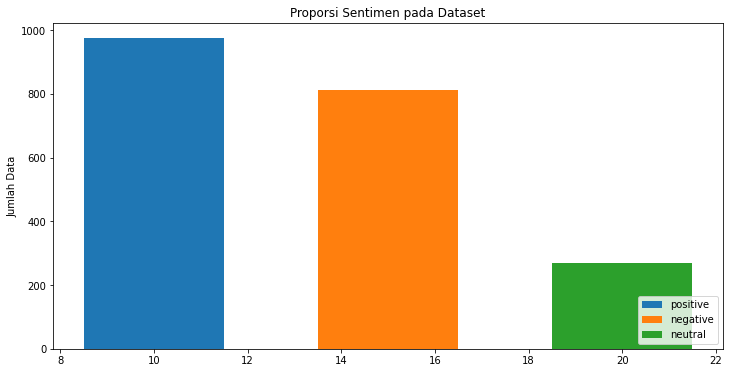

In [ ]:
# bar plot of the 3 classes
from matplotlib import pyplot as plt
plt.bar(10,POS_len,3, label="positive")
plt.bar(15,NEG_len,3, label="negative")
plt.bar(20,NET_len,3, label="neutral")
plt.legend(loc='lower right')
plt.ylabel('Jumlah Data')
plt.title('Proporsi Sentimen pada Dataset')
plt.savefig('barchart.png',bbox_inches='tight')
plt.show()

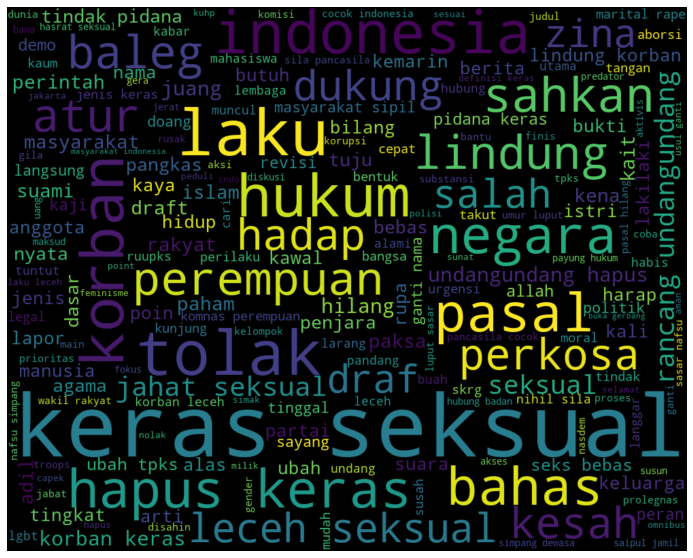

In [ ]:
# Plot The Word Cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allWords  = ' '.join( [str (twts) for twts in datafix['tweet']])
wordCloud = WordCloud(width = 1000, height=800, random_state=21, max_font_size=400).generate(allWords)

plt.figure( figsize=(20,10) )
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.savefig('wordcloud.png',bbox_inches='tight')
plt.show()

In [ ]:
a = datafix['tweet'] == ''
datafix[a].count()

tweet        29
sentiment    29
dtype: int64

In [ ]:
POS_data = datafix[datafix['sentiment'] == 'positive']
NEG_data = datafix[datafix['sentiment'] == 'negative']
NET_data = datafix[datafix['sentiment'] == 'neutral']

In [ ]:
from collections import defaultdict
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in stop]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 100

# Unigrams
positive_unigrams = defaultdict(int)

for tweet in POS_data['tweet']:
    for word in generate_ngrams(tweet):
        positive_unigrams[word] += 1
         
df_top_positive = pd.DataFrame(sorted(positive_unigrams.items(), key=lambda x: x[1])[::-1])
df_top_positive = df_top_positive.rename(columns={0:'Word',1:'Count'})

# Bigrams
positive_bigrams = defaultdict(int)

for tweet in POS_data['tweet']:
    for word in generate_ngrams(tweet,n_gram=2):
        positive_bigrams[word] += 1
        
df_top_positive_bi = pd.DataFrame(sorted(positive_bigrams.items(), key=lambda x: x[1])[::-1])
df_top_positive_bi = df_top_positive_bi.rename(columns={0:'Word',1:'Count'})

# Trigrams
positive_trigrams = defaultdict(int)

for tweet in POS_data['tweet']:
    for word in generate_ngrams(tweet,n_gram=3):
        positive_trigrams[word] += 1
        
df_top_positive_tri = pd.DataFrame(sorted(positive_trigrams.items(), key=lambda x: x[1])[::-1])
df_top_positive_tri = df_top_positive_tri.rename(columns={0:'Word',1:'Count'})


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


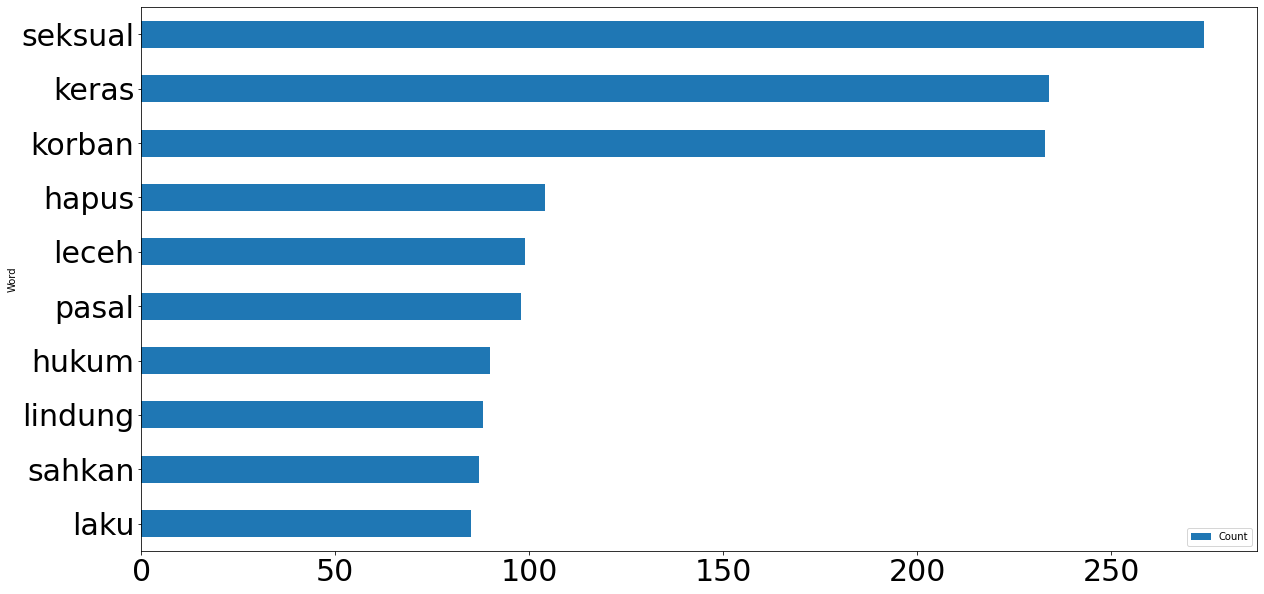

In [ ]:
df_top_positive.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('haha.png',bbox_inches='tight')

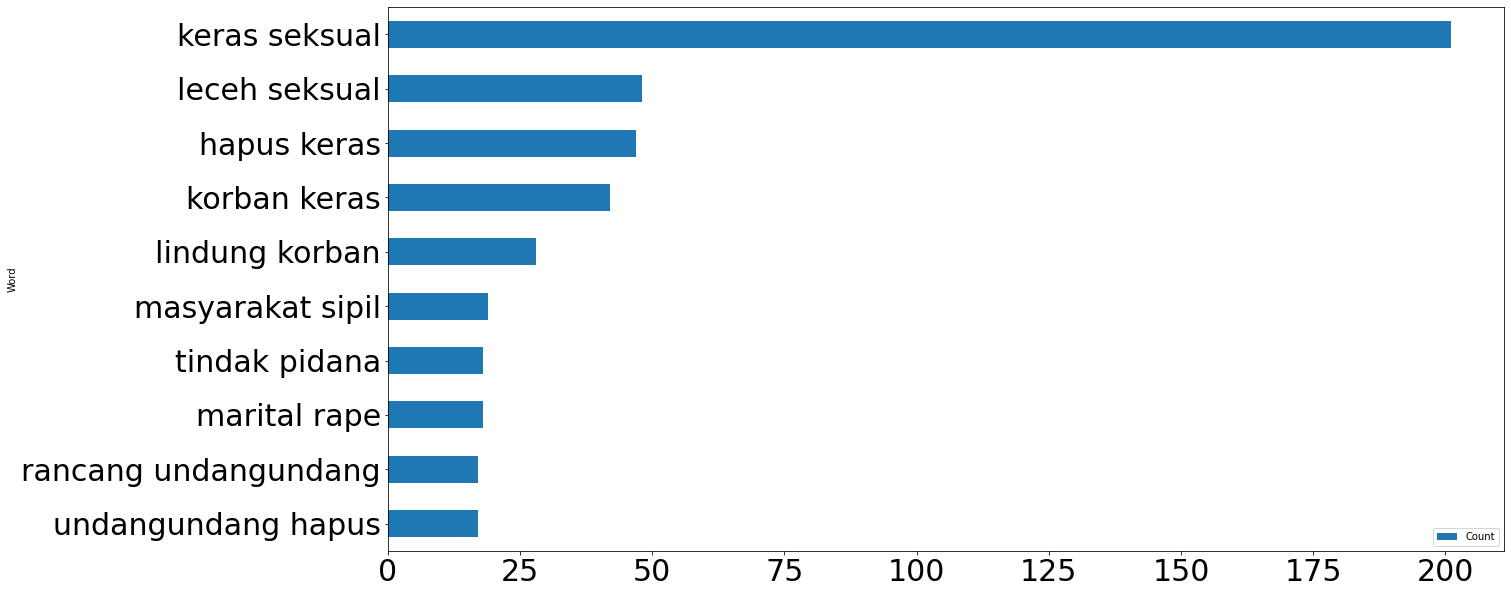

In [ ]:
df_top_positive_bi.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('haha1.png',bbox_inches='tight')

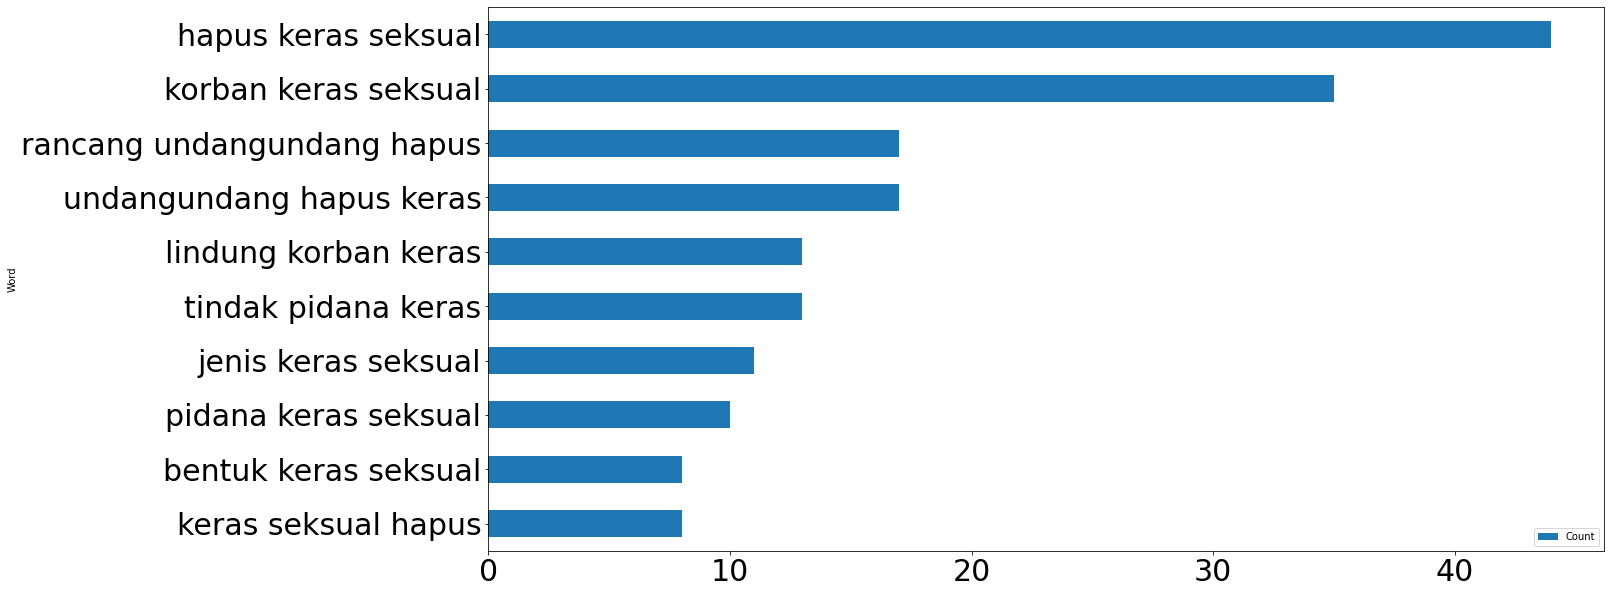

In [ ]:
df_top_positive_tri.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('haha2.png',bbox_inches='tight')

Negative

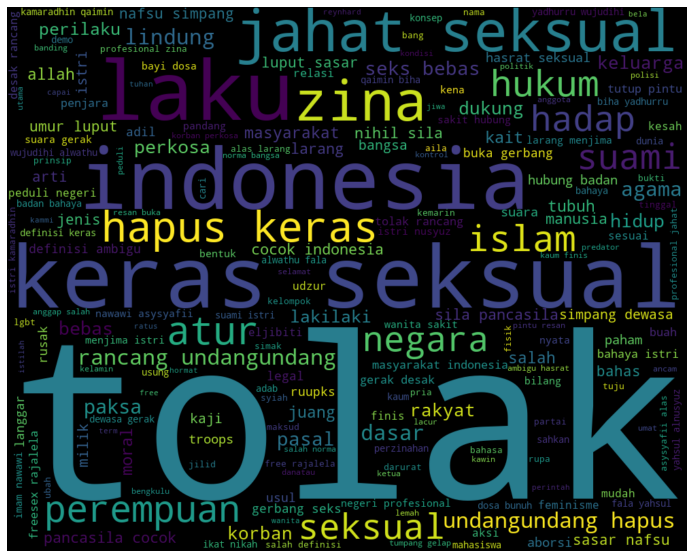

In [ ]:
# Plot The Word Cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allWords  = ' '.join( [twts for twts in NEG_data['tweet']])
wordCloud = WordCloud(width = 1000, height=800, random_state=21, max_font_size=400).generate(allWords)

plt.figure( figsize=(20,10) )
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Unigrams
negative_unigrams = defaultdict(int)

for tweet in NEG_data['tweet']:
    for word in generate_ngrams(tweet):
        negative_unigrams[word] += 1
         
df_top_negative = pd.DataFrame(sorted(negative_unigrams.items(), key=lambda x: x[1])[::-1])
df_top_negative = df_top_negative.rename(columns={0:'Word',1:'Count'})

# Bigrams
negative_bigrams = defaultdict(int)

for tweet in NEG_data['tweet']:
    for word in generate_ngrams(tweet,n_gram=2):
        negative_bigrams[word] += 1
        
df_top_negative_bi = pd.DataFrame(sorted(negative_bigrams.items(), key=lambda x: x[1])[::-1])
df_top_negative_bi = df_top_negative_bi.rename(columns={0:'Word',1:'Count'})

# Trigrams
negative_trigrams = defaultdict(int)

for tweet in NEG_data['tweet']:
    for word in generate_ngrams(tweet,n_gram=3):
        negative_trigrams[word] += 1
        
df_top_negative_tri = pd.DataFrame(sorted(negative_trigrams.items(), key=lambda x: x[1])[::-1])
df_top_negative_tri = df_top_negative_tri.rename(columns={0:'Word',1:'Count'})


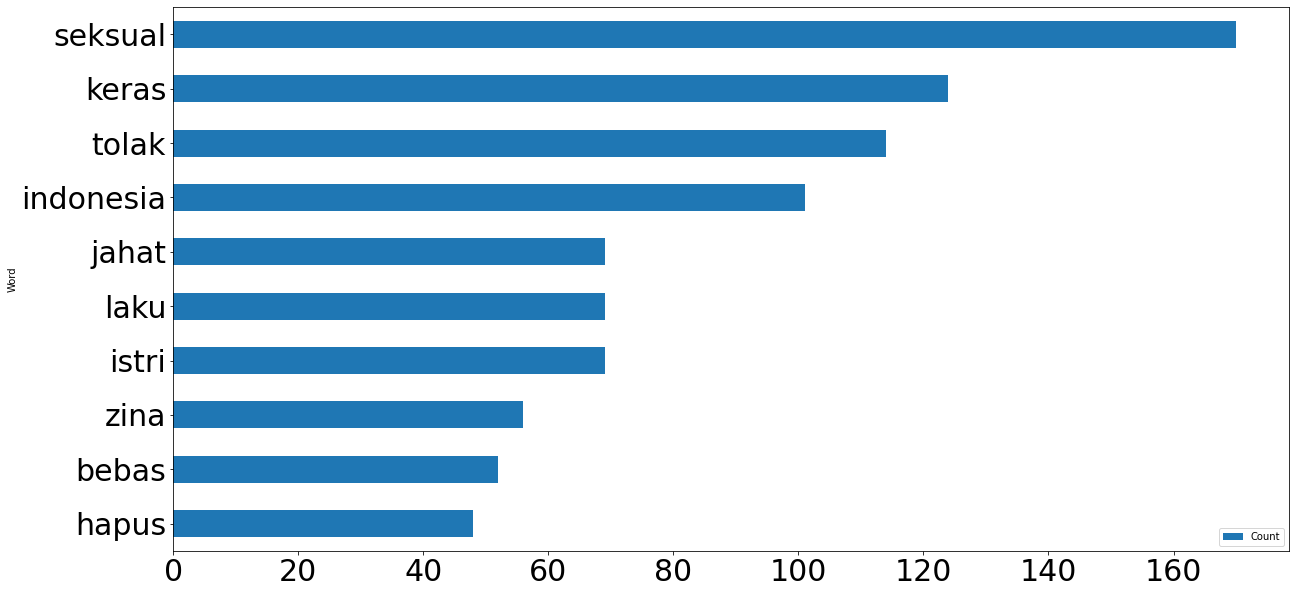

In [ ]:
df_top_negative.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('hihi.png',bbox_inches='tight')

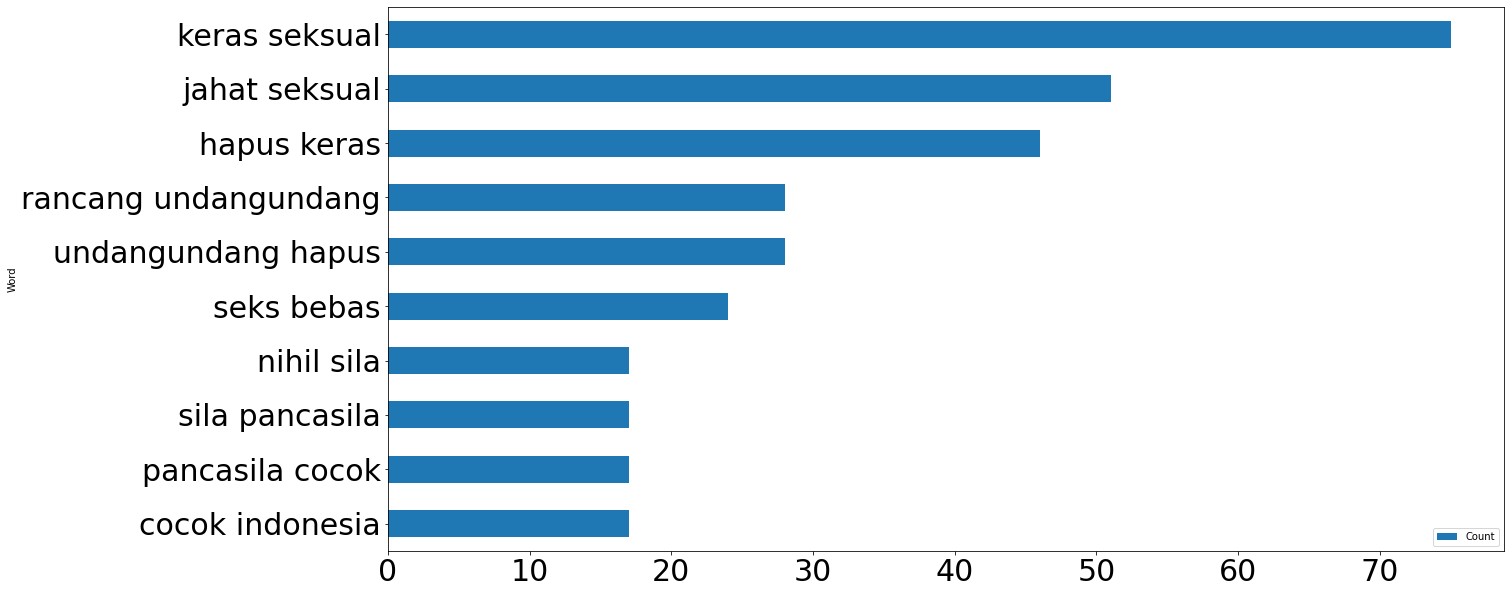

In [ ]:
df_top_negative_bi.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('hihi1.png',bbox_inches='tight')

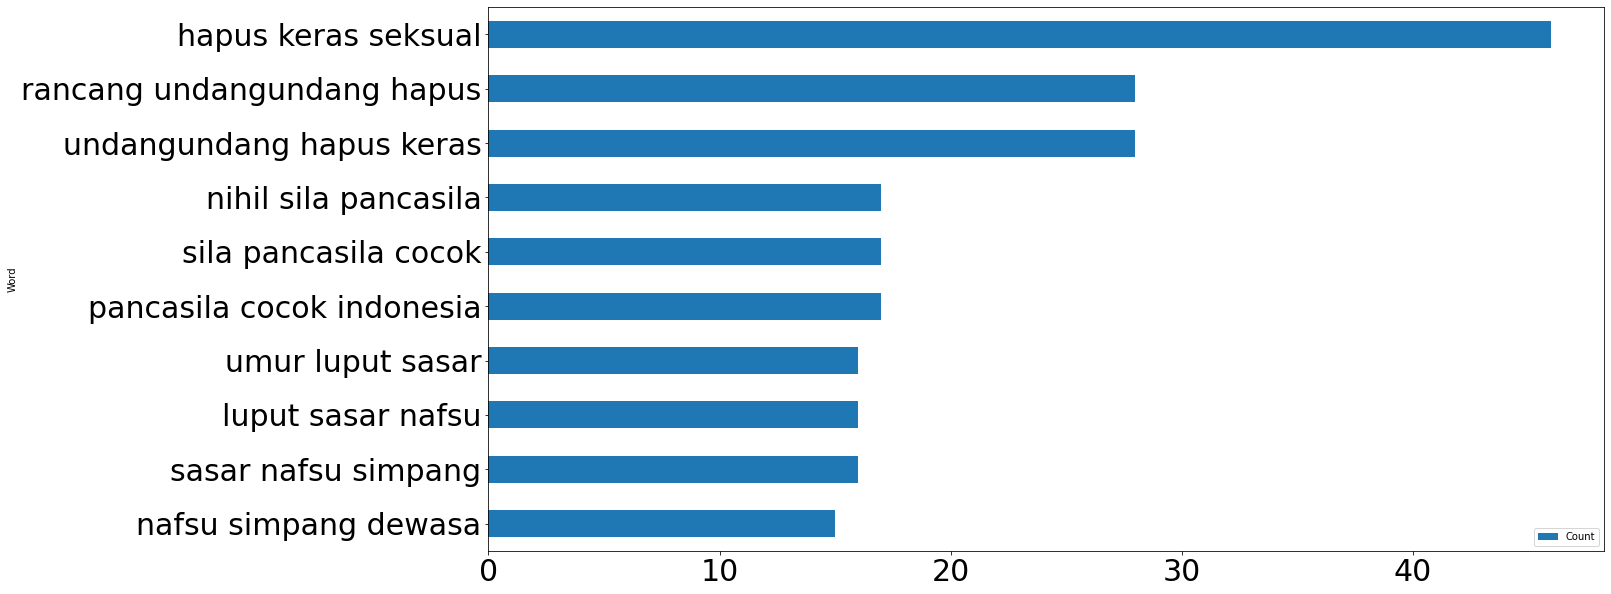

In [ ]:
df_top_negative_tri.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('hihi2.png',bbox_inches='tight')

Netral

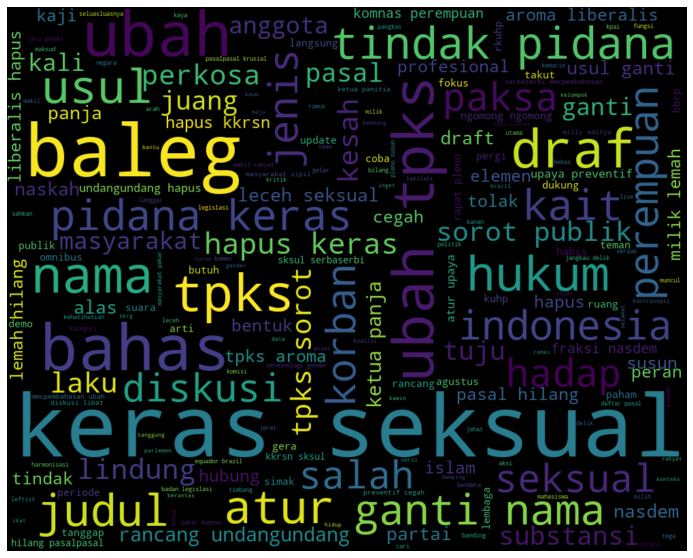

In [ ]:
# Plot The Word Cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allWords  = ' '.join( [twts for twts in NET_data['tweet']])
wordCloud = WordCloud(width = 1000, height=800, random_state=21, max_font_size=400).generate(allWords)

plt.figure( figsize=(20,10) )
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Unigrams
neutral_unigrams = defaultdict(int)

for tweet in NET_data['tweet']:
    for word in generate_ngrams(tweet):
        neutral_unigrams[word] += 1
         
df_top_neutral = pd.DataFrame(sorted(neutral_unigrams.items(), key=lambda x: x[1])[::-1])
df_top_neutral = df_top_neutral.rename(columns={0:'Word',1:'Count'})

# Bigrams
neutral_bigrams = defaultdict(int)

for tweet in NET_data['tweet']:
    for word in generate_ngrams(tweet,n_gram=2):
        neutral_bigrams[word] += 1
        
df_top_neutral_bi = pd.DataFrame(sorted(neutral_bigrams.items(), key=lambda x: x[1])[::-1])
df_top_neutral_bi = df_top_neutral_bi.rename(columns={0:'Word',1:'Count'})

# Trigrams
neutral_trigrams = defaultdict(int)

for tweet in NET_data['tweet']:
    for word in generate_ngrams(tweet,n_gram=3):
        neutral_trigrams[word] += 1
        
df_top_neutral_tri = pd.DataFrame(sorted(neutral_trigrams.items(), key=lambda x: x[1])[::-1])
df_top_neutral_tri = df_top_neutral_tri.rename(columns={0:'Word',1:'Count'})


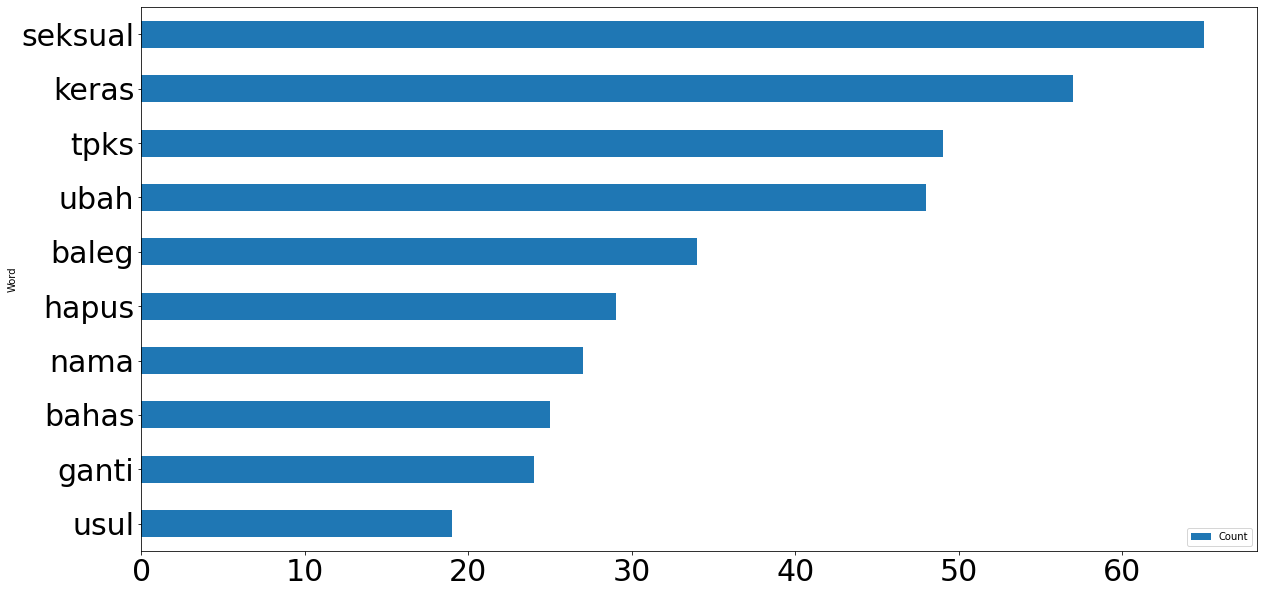

In [ ]:
df_top_neutral.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('huhu.png',bbox_inches='tight')

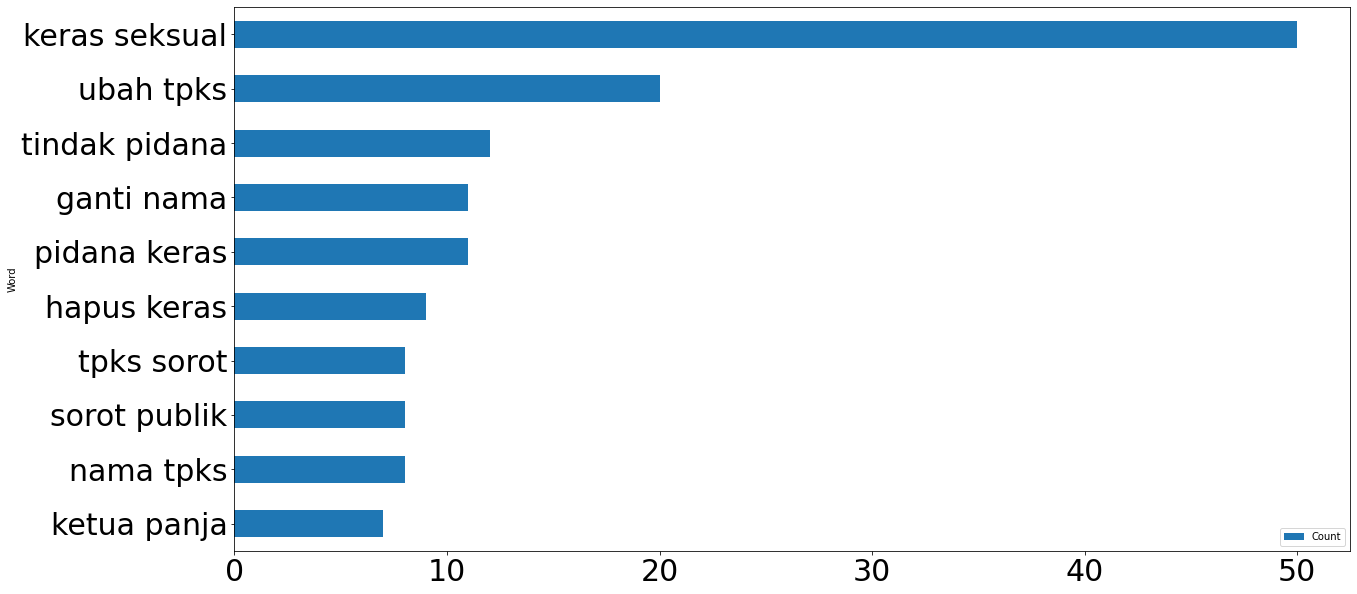

In [ ]:
df_top_neutral_bi.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('huhu1.png',bbox_inches='tight')

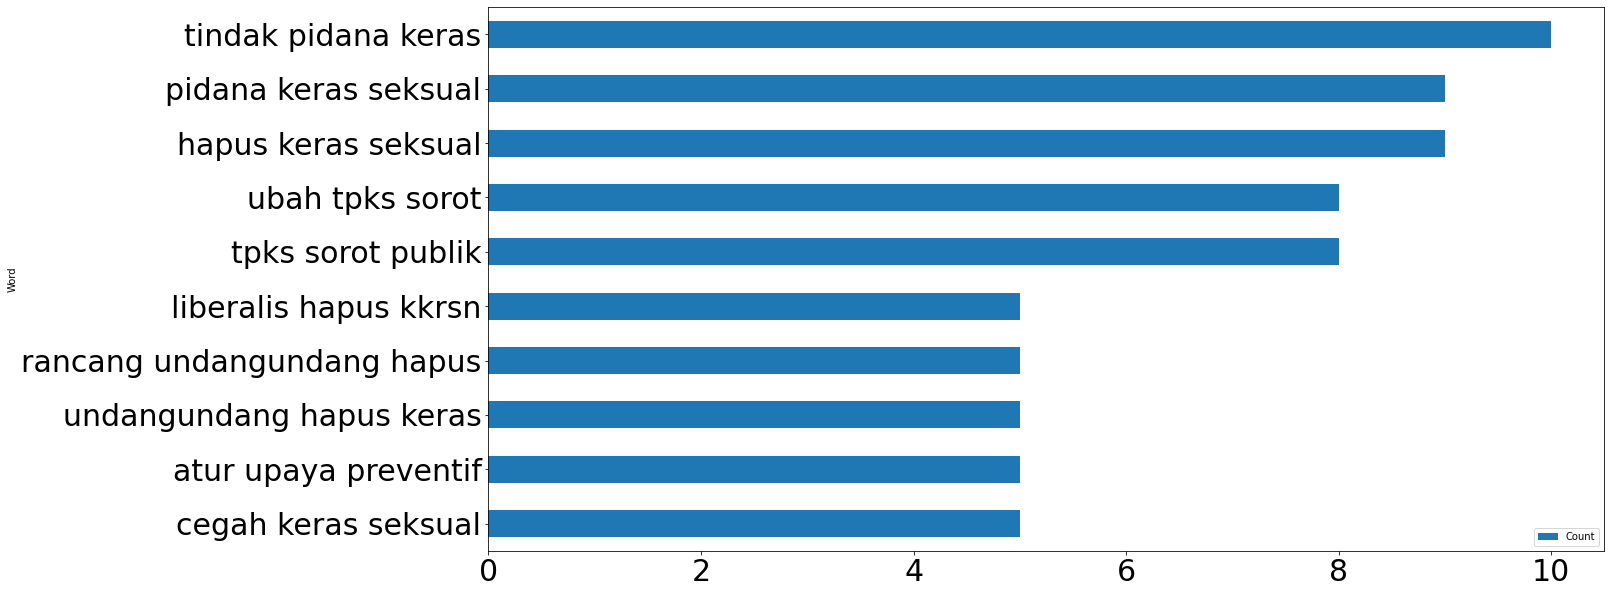

In [ ]:
df_top_neutral_tri.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('huhu2.png',bbox_inches='tight')